# 🍽️ Zomato Restaurant Data Analysis  
**Author:** Gagan Santia | **Tools Used:** Python, Pandas, Matplotlib, Seaborn  
Analyzing restaurant trends in Bangalore using the Zomato dataset to extract insights about cuisines, ratings, and cost factors.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-dataset/zomato.csv


Now, the session is started. 
First of all, we'll be **adding the necessary libraries**:

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  


# Introduction

In this project, we analyze the **Zomato Bangalore Restaurants dataset** to uncover patterns in restaurant ratings, locations, cuisines, pricing, etc. Our **goal** is to **explore customer preferences, spending behavior, and dining trends** in Bangalore using the dataset.

We will perform:

1) **Data Cleaning:** Handle nulls, duplicates, and inconsistent formats

2) **EDA (Exploratory Data Analysis):** Explore trends in ratings, costs, locations,etc.

3) **Visualizations:** Bar plots, pie charts, boxplots, and heatmaps to find insights and correlations


This analysis can help businesses and customers better understand restaurant trends in Bangalore.

In [3]:
filep = '/kaggle/input/zomato-restaurants-dataset/zomato.csv'

mydata = pd.read_csv(filep)    

# Dataset Overview

Let us first get a glimpse of the data:

In [4]:
mydata.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


So, we got an idea about how the dataset looks like. We are able to see the different columns, the type of data they contain and their respective counts. 

In [6]:
mydata.describe() #to show basic statistics about the data

,Unnamed: 0.1,Unnamed: 0,rate (out of 5),num of ratings,avg cost (two people)
count,7105.000000,7105.000000,7037.000000,7105.000000,7048.000000
mean,3552.000000,3552.000000,3.514253,188.921042,540.286464
std,2051.181164,2051.181164,0.463249,592.171049,462.902305
min,0.000000,0.000000,1.800000,1.000000,40.000000
25%,1776.000000,1776.000000,3.200000,16.000000,300.000000
50%,3552.000000,3552.000000,3.500000,40.000000,400.000000
75%,5328.000000,5328.000000,3.800000,128.000000,600.000000
max,7104.000000,7104.000000,4.900000,16345.000000,6000.000000


# Data Cleaning & Preparation

Alright, it's now time to perform data cleaning to ensure smooth and accurate analysis going forward.

In [7]:
# First of all let's remove the unwanted columns first:
mydata.drop('Unnamed: 0.1',axis= 1,inplace = True) 
mydata.drop('Unnamed: 0',axis= 1,inplace = True)

In [8]:
mydata.head()

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


Moving on further, we'll now be **handling null values** in the dataset:

In [9]:
mydata.isnull().sum() 

restaurant name           0
restaurant type           0
rate (out of 5)          68
num of ratings            0
avg cost (two people)    57
online_order              0
table booking             0
cuisines type             0
area                      0
local address             0
dtype: int64

In [10]:
# Filling the null values with the mean of their fields:
mydata['rate (out of 5)'].fillna(mydata['rate (out of 5)'].mean(), inplace = True)
mydata['avg cost (two people)'].fillna(mydata['avg cost (two people)'].mean(), inplace = True)

In [11]:
mydata.isnull().sum()

restaurant name          0
restaurant type          0
rate (out of 5)          0
num of ratings           0
avg cost (two people)    0
online_order             0
table booking            0
cuisines type            0
area                     0
local address            0
dtype: int64

Now, let's check for any **duplicates** in the dataset:

In [12]:
mydata.duplicated().sum()

0

Perfect!

Next, we proceed to the last step of data cleaning, that is, **handling inconsistent formats** across various fields.

First up we'll be checking various categorical columns for any inconsistent values.

In [13]:
mydata['restaurant type'].value_counts()

restaurant type
Quick Bites              2840
Casual Dining            1634
Cafe                      403
Delivery                  358
Takeaway, Delivery        289
                         ... 
Microbrewery, Lounge        1
Bakery, Beverage Shop       1
Bar, Pub                    1
Quick Bites, Mess           1
Club, Casual Dining         1
Name: count, Length: 81, dtype: int64

In [14]:
mydata['cuisines type'].value_counts()

cuisines type
North Indian, Chinese                            421
North Indian                                     420
South Indian                                     348
Fast Food                                        140
South Indian, North Indian, Chinese              128
                                                ... 
Seafood, Andhra                                    1
Beverages, Cafe, Desserts, Spanish, Bakery         1
Goan, Seafood, North Indian, Chinese, Biryani      1
Healthy Food, Cafe, Beverages                      1
Turkish, Fast Food, Biryani, Chinese               1
Name: count, Length: 2175, dtype: int64

In [15]:
mydata['area'].value_counts()

area
Byresandra,Tavarekere,Madiwala    798
Bannerghatta Road                 552
Brookefield                       477
Brigade Road                      464
Indiranagar                       455
Electronic City                   403
Malleshwaram                      402
Kalyan Nagar                      384
Bellandur                         361
Banashankari                      359
Whitefield                        261
Marathahalli                      260
HSR                               241
Basavanagudi                      214
New BEL Road                      168
Koramangala 4th Block             162
Rajajinagar                       148
Lavelle Road                      141
Jayanagar                         127
Frazer Town                       126
Sarjapur Road                     108
Old Airport Road                   91
Church Street                      77
Koramangala 6th Block              71
JP Nagar                           69
Kammanahalli                       65
Koraman

In [16]:
mydata['restaurant name'].value_counts()

restaurant name
#FeelTheROLL                         1
Pizza Palace                         1
Platter                              1
Plated                               1
Plantain Leaf                        1
                                    ..
GMT - Gelateria Montecatini Terme    1
Global Flavors                       1
Glen's Bakehouse                     1
Glassy                               1
Zyksha                               1
Name: count, Length: 7105, dtype: int64

In [17]:
mydata['local address'].value_counts()

local address
Whitefield         459
BTM                458
Electronic City    404
Marathahalli       381
HSR                378
                  ... 
West Bangalore       2
Kengeri              1
Nagarbhavi           1
Peenya               1
Langford Town        1
Name: count, Length: 90, dtype: int64

We can see that there are several issues with prominent fields like **cuisine type** and **restaurant type**. 

We can find issues like several categories being merged into one like: 'South Indian, North Indian, Chinese' in cuisine type and 'Takeaway, Delivery' in restaurant types. So, in the next section we'll be looking forward to handle such challenges.

In [18]:
# Putting all the characters in lower case and removing all the unnecessary spaces.
mydata['cuisines type'] = mydata['cuisines type'].str.lower().str.strip()

In [19]:
# Split multiple cuisines into a list for each restaurant
mydata['cuisine_list'] = mydata['cuisines type'].str.split(', ')

In [20]:
# Spreading the items of the list into separate rows
mydata = mydata.explode('cuisine_list')

In [21]:
mydata['cuisine_list'].value_counts()

cuisine_list
north indian     3237
chinese          2438
south indian     1464
fast food        1037
biryani           929
                 ... 
jewish              1
roast chicken       1
hot dogs            1
drinks only         1
cantonese           1
Name: count, Length: 106, dtype: int64

Performing the same set of operations for **'restaurant type'** column:

In [22]:
mydata['restaurant type'] = mydata['restaurant type'].str.lower().str.strip()

In [23]:
mydata['restaurant type']= mydata['restaurant type'].str.split(', ')

In [24]:
mydata = mydata.explode('restaurant type')

In [25]:
mydata['restaurant type'].value_counts()

restaurant type
quick bites       6434
casual dining     5732
cafe              1520
delivery          1430
bar                830
takeaway           693
dessert parlor     574
bakery             421
beverage shop      360
pub                296
fine dining        235
lounge             200
sweet shop         191
food court         184
microbrewery       165
mess                81
kiosk               65
food truck          37
club                14
dhaba               13
confectionery        2
irani cafee          2
meat shop            2
bhojanalya           1
Name: count, dtype: int64

# EDA (Exploratory Data Analysis)

Done with data cleaning, now let's get to the most important part- EDA (Exploratory Data Analysis) after which we'll be able to derive actionable business insights.

In [26]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19482 entries, 0 to 7104
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant name        19482 non-null  object 
 1   restaurant type        19482 non-null  object 
 2   rate (out of 5)        19482 non-null  float64
 3   num of ratings         19482 non-null  int64  
 4   avg cost (two people)  19482 non-null  float64
 5   online_order           19482 non-null  object 
 6   table booking          19482 non-null  object 
 7   cuisines type          19482 non-null  object 
 8   area                   19482 non-null  object 
 9   local address          19482 non-null  object 
 10  cuisine_list           19482 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.8+ MB


In [27]:
mydata.head()

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address,cuisine_list
0,#FeelTheROLL,quick bites,3.4,7,200.0,No,No,fast food,Bellandur,Bellandur,fast food
1,#L-81 Cafe,quick bites,3.9,48,400.0,Yes,No,"fast food, beverages","Byresandra,Tavarekere,Madiwala",HSR,fast food
1,#L-81 Cafe,quick bites,3.9,48,400.0,Yes,No,"fast food, beverages","Byresandra,Tavarekere,Madiwala",HSR,beverages
2,#refuel,cafe,3.7,37,400.0,Yes,No,"cafe, beverages",Bannerghatta Road,Bannerghatta Road,cafe
2,#refuel,cafe,3.7,37,400.0,Yes,No,"cafe, beverages",Bannerghatta Road,Bannerghatta Road,beverages


Let us check the top 10 most common cuisine types across all restaurants in the dataset:

Text(0.5, 1.0, 'Top 10 Most Common Cuisines')

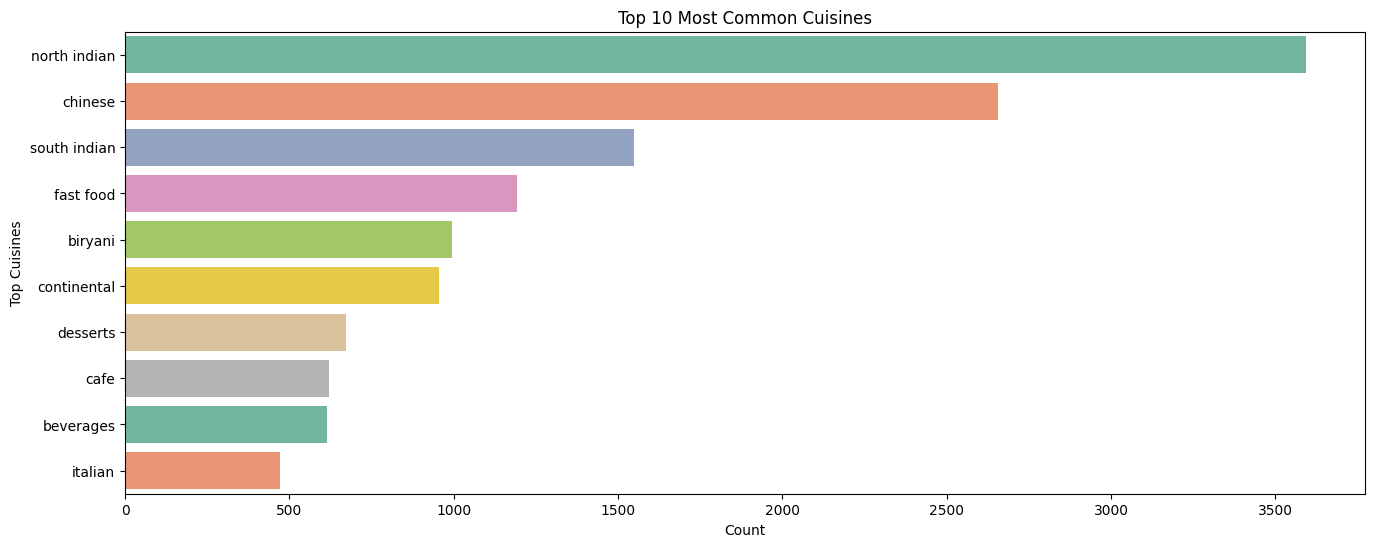

In [28]:
top_cuisines = mydata['cuisine_list'].value_counts().head(10)

plt.figure(figsize=(16,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette = 'Set2')
plt.xlabel('Count')
plt.ylabel('Top Cuisines')
plt.title("Top 10 Most Common Cuisines")

These are the most commonly offered cuisine types across restaurants.
> **North Indian**, **Chinese** and **South Indian** cuisine types top the chart.

Here's another plot, a histogram checking for average cost for two people filtered by table booking:

Text(0.5, 1.0, 'Average Cost (two people)')

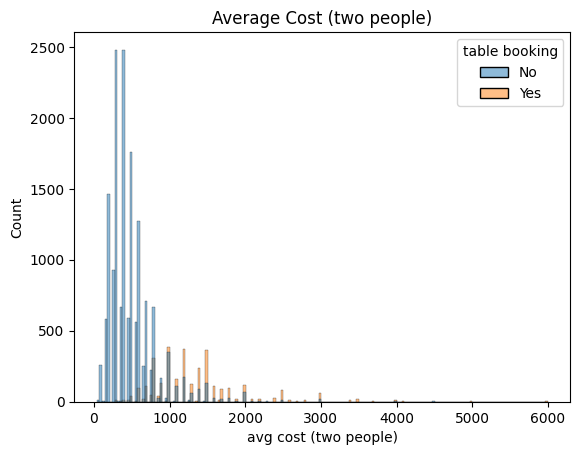

In [29]:
sns.histplot(data= mydata,x='avg cost (two people)', hue= 'table booking')
plt.title('Average Cost (two people)')

We can clearly see from the above plot that restaurants offering **table booking** have **higher average costs** suggesting that premium service is associated with higher prices.

Now, let’s take a look at the scatterplot showing the relationship between **customer ratings and average cost**.

Text(0.5, 1.0, 'Average Cost Vs Customer Ratings')

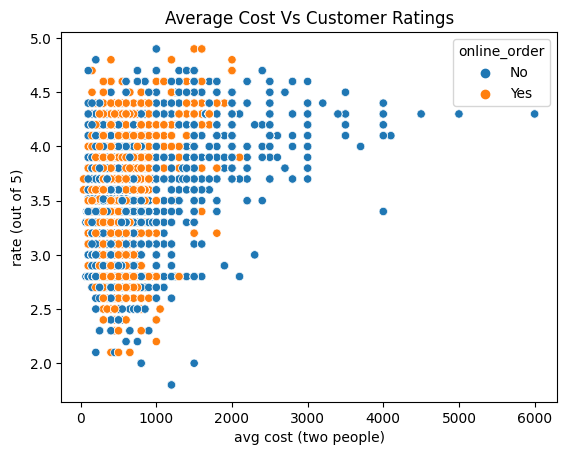

In [30]:
sns.scatterplot(data= mydata,y='rate (out of 5)',x= 'avg cost (two people)',hue = 'online_order')
plt.title('Average Cost Vs Customer Ratings')

The plot suggests a **weak positive correlation**, with several noticeable outliers. Still, a few key insights can be drawn:

1. **Non-online orders** tend to be **more expensive** compared to online orders.
2. Most **online orders** fall within the **₹0–₹1000 range**, indicating that people usually order for themselves rather than for a group or family.
3. Customer ratings are **influenced by more than just cost** — factors like service, delivery time, and taste likely play a big role too.

In [31]:
# Correlation between average cost and customer ratings
mydata[['rate (out of 5)','avg cost (two people)']].corr()

,rate (out of 5),avg cost (two people)
rate (out of 5),1.000000,0.435234
avg cost (two people),0.435234,1.000000


As already inferred from the scatterplot that there exists a weak positive correlation between customer ratings and average cost.

Let's visualize a box plot showing customer ratings filtered by online order.

Text(0.5, 1.0, 'Customer Ratings')

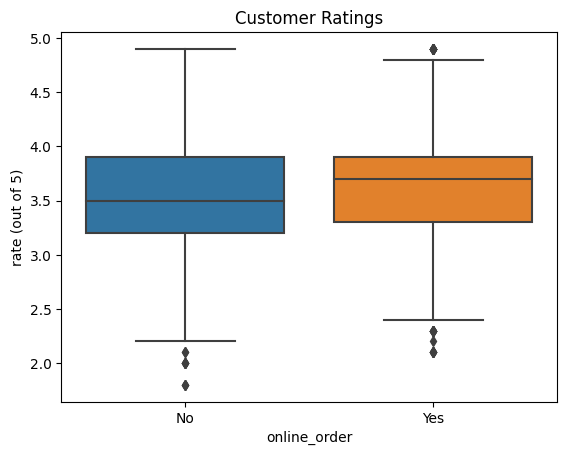

In [32]:
sns.boxplot(data= mydata,y= 'rate (out of 5)',x='online_order')
plt.title('Customer Ratings')

The above box plot shows that both **online orders and non-online orders** are **similarly rated** which implies that this is **not a significant factor affecting the customer rating**. There would be other important factors such as taste, delivery time, ambiance, etc impacting the customer experience

**Correlation matrix between all the numeric fields:** 

Text(0.5, 1.0, 'Correlation Matrix')

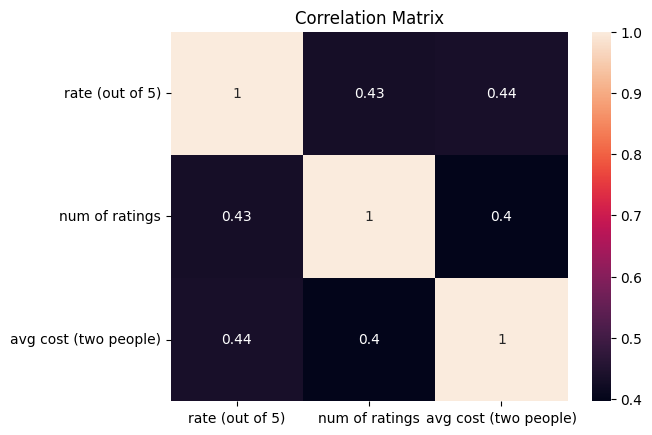

In [33]:
corr_mat = mydata[['rate (out of 5)','num of ratings','avg cost (two people)']].corr()
sns.heatmap(data=corr_mat,annot=True)
plt.title('Correlation Matrix')

The above heatmap  **fails to show any key insights** as all these fields are **weakly correlated** to each other implying that there are other important factors in the play.

To better understand the dataset we'll be **grouping cuisine types** for further analysis:

Text(0.5, 1.0, 'Most Expensive Cuisine Types')

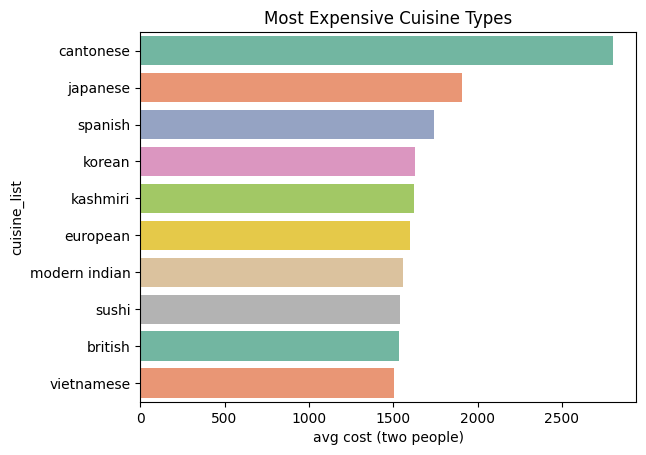

In [34]:
# Grouping the data by cuisine type to find average rating and average cost for each
mydata1 = mydata[mydata['num of ratings'] > 20]
grpd_cuis = mydata1.groupby('cuisine_list')[['rate (out of 5)', 'avg cost (two people)']].mean()

# Sorting the above variable to get the cuisine types which have the highest average cost 
top_cuis1 = grpd_cuis.sort_values(by='avg cost (two people)', ascending = False).head(10)

sns.barplot(x=top_cuis1['avg cost (two people)'], y=top_cuis1.index, palette='Set2')
plt.title('Most Expensive Cuisine Types')

These are among the **most premium cuisine types**, with average costs for two people surpassing ₹1500.

Performing the same set of operations for **restaurant type** to get the average rating and average cost for each one of it.

Text(0.5, 1.0, 'Most expensive Restaurant Types')

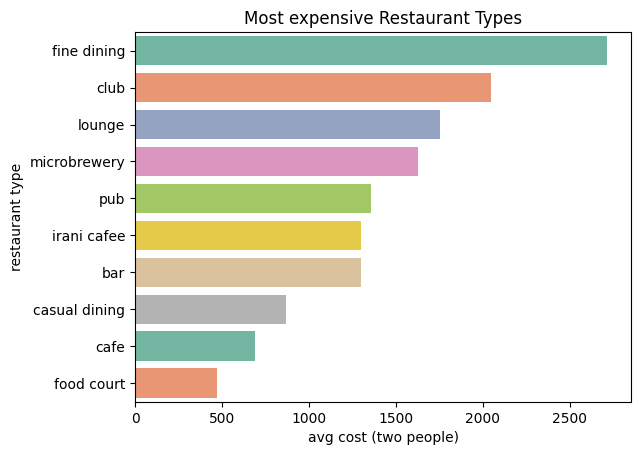

In [35]:
grpd_rest = mydata1.groupby('restaurant type')[['rate (out of 5)','avg cost (two people)']].mean()

top_rest = grpd_rest.sort_values(by= 'avg cost (two people)',ascending = False).head(10)

sns.barplot(x= top_rest['avg cost (two people)'],y = top_rest.index, palette= 'Set2')
plt.title('Most expensive Restaurant Types')

These are among the **most premium restaurant types**, with average costs for two people often surpassing ₹500.

# Visualisation

Finally, we’ve reached the last part: **Visualizing the key insights from the data**.

In the previous section, we explored various plots, charts, and graphs to look for patterns, trends, or relationships in the dataset. Now, we’ve picked the most meaningful visualizations below — these clearly highlight useful business insights and can help with decision-making.

* Distribution of **Restaurant types in Bangalore**

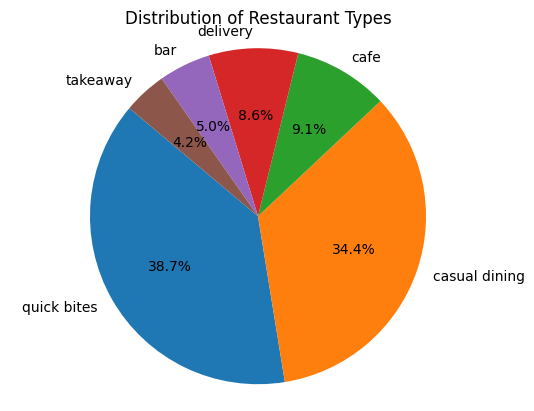

In [36]:
top_rest_type = mydata['restaurant type'].value_counts().head(6)
plt.pie(top_rest_type.values, labels=top_rest_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Restaurant Types')
plt.axis('equal')  
plt.show()

> The above pie chart shows **top 6 most popular restaurant types** in Bangalore. **Quick bites** and **casual dining** restaurant types rule the entire Bangalore. 

Now let us check the **highest rated restaurant types** in Bangalore:

Text(0.5, 1.0, 'Highest Rated Restaurant Types')

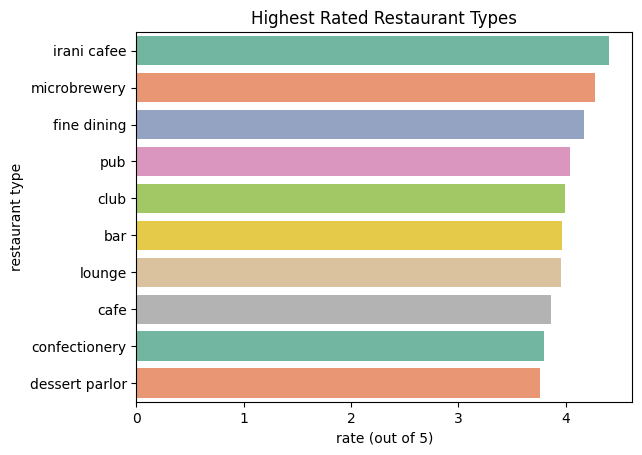

In [37]:
top_rest1 = grpd_rest.sort_values(by= 'rate (out of 5)',ascending = False).head(10)
sns.barplot(x= top_rest1['rate (out of 5)'],y = top_rest1.index, palette= 'Set2')
plt.title('Highest Rated Restaurant Types')

> The highest rated ones include **Irani Cafe**, **Microbrewery**, and **Fine Dining** — **all three** of which also appear in the **top 10 most expensive restaurant types**.

> Only **Cafe** and **Bar** from the pie chart of **most common restaurant types** appear among the **top-rated restaurant types**.

> This implies that **premium restaurant types tend to receive higher customer ratings**, possibly due to better ambiance, service, or overall dining experience.

Analyzing **customer ratings and average cost** by segmenting restaurants based on service features such as **online ordering availability or table booking** options:

Text(0.5, 1.0, 'Average cost')

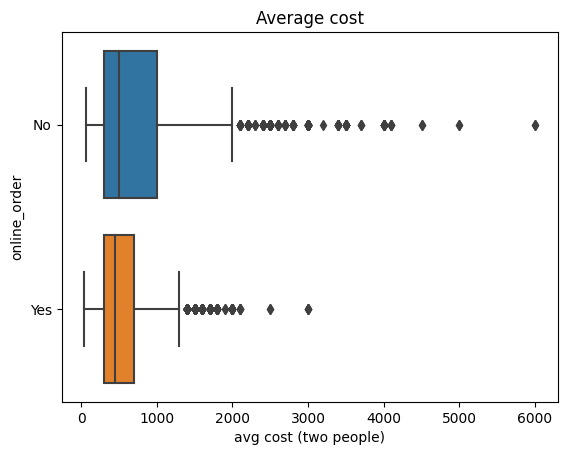

In [38]:
sns.boxplot(data= mydata,x= 'avg cost (two people)',y='online_order')
plt.title('Average cost')

This boxplot also reveals some valuable insights:

> **Non-online orders** are generally **more expensive** than online orders, reinforcing the trend observed in the scatterplot earlier.

> While **both online and non-online orders** have a similar **median cost** of around **₹500**, the **cost range for non-online orders is much wider**, with several **high-value outliers**.

> This suggests that **non-online orders** — possibly from **table bookings or dine-in experiences** — often involve larger or more premium orders, leading to higher costs.

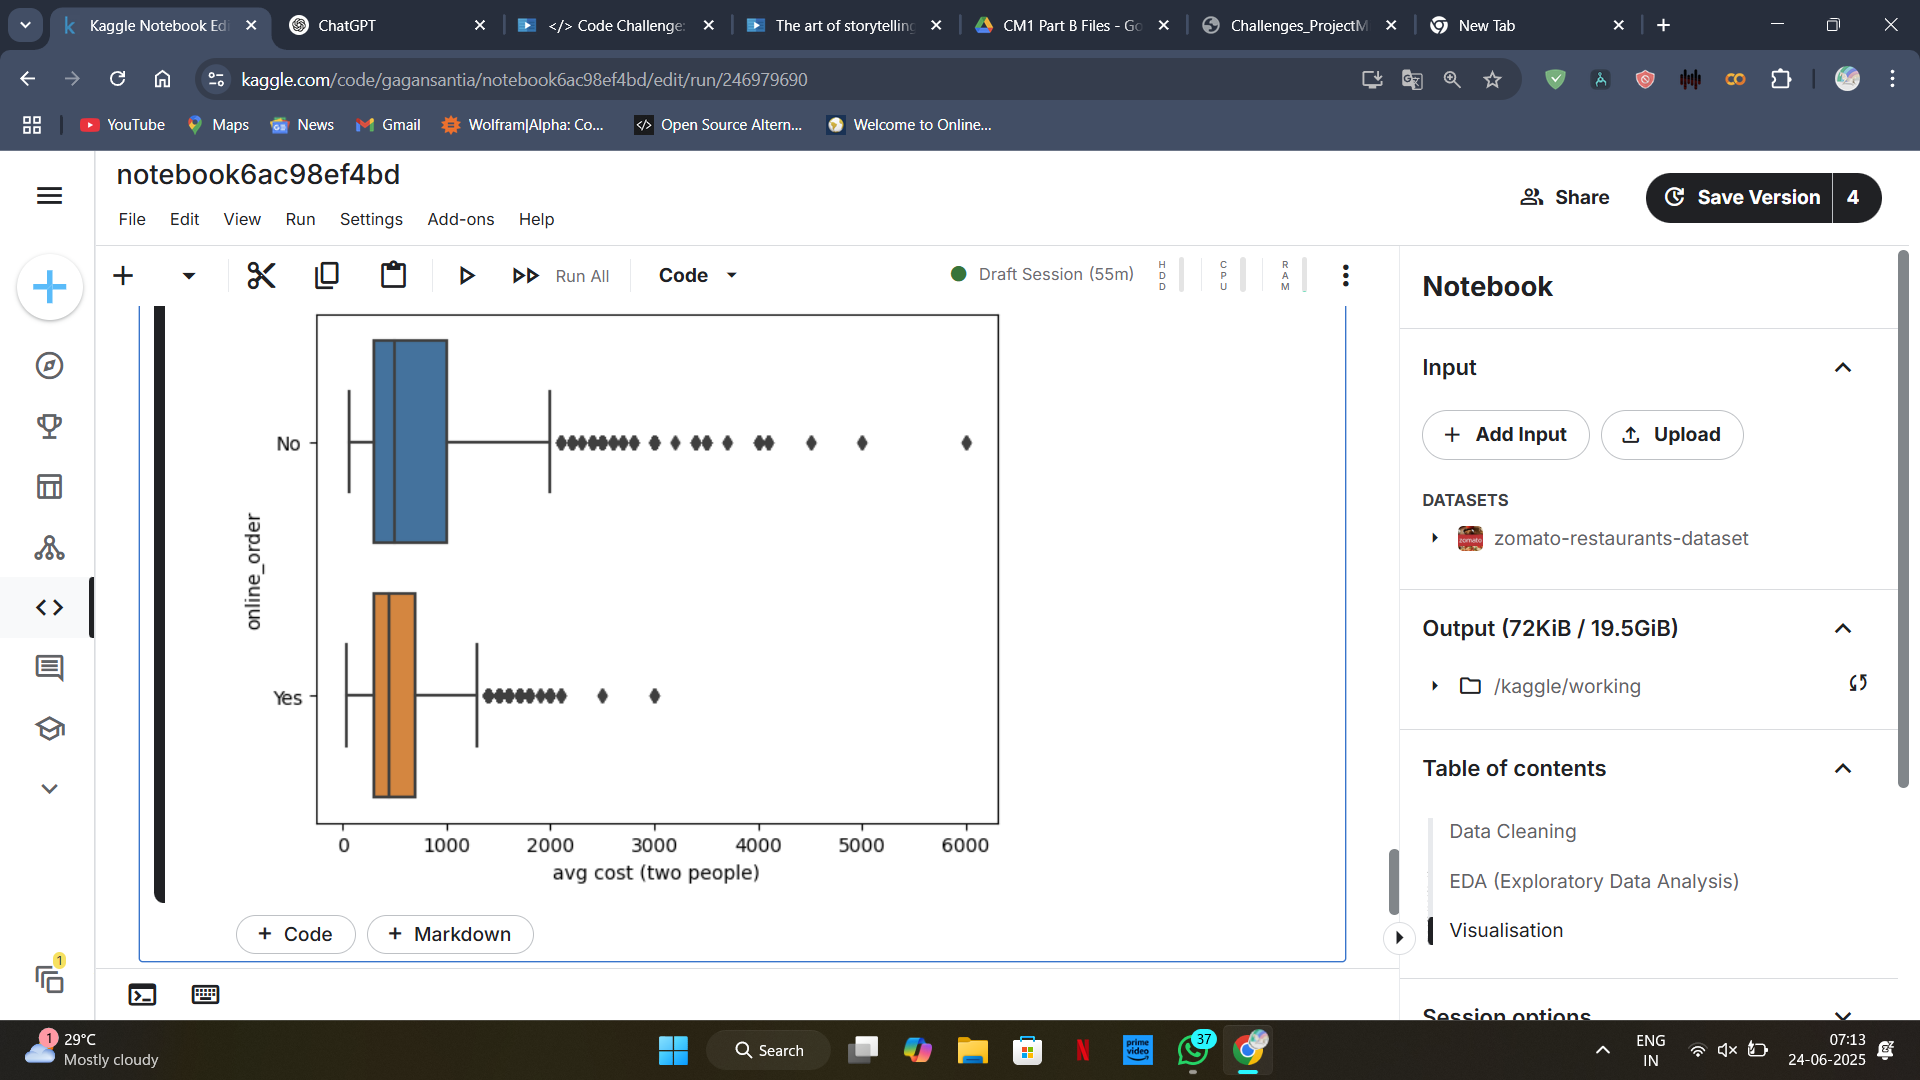

Text(0.5, 1.0, 'Customer Ratings')

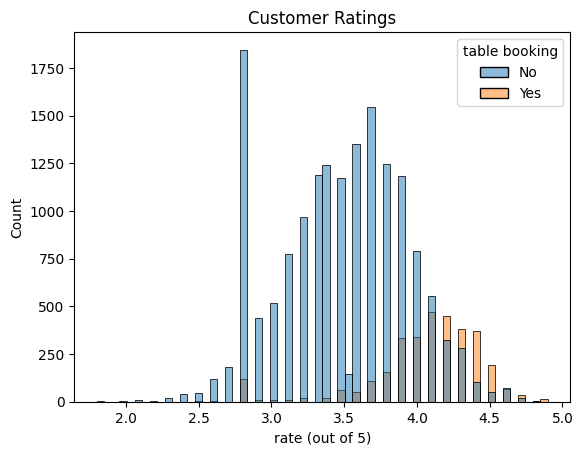

In [39]:
sns.histplot(data=mydata, x= 'rate (out of 5)', hue= 'table booking')
plt.title('Customer Ratings')

Restaurants that offer **table booking** tend to **receive higher customer ratings** compared to those that don't.

> This highlights a **clear trend**: **people in Bangalore** often prefer **dine-in experiences** that come with **premium services, pleasant ambiance, and a comfortable environment**.

> It reflects a relatively **affluent customer base**, one that **values quality and experience** over discounts typically offered by online ordering platforms.

At last we have a plot showing the **most loved cuisine types** by Bangalore people:

Text(0.5, 1.0, 'Highest Rated Cuisine Types')

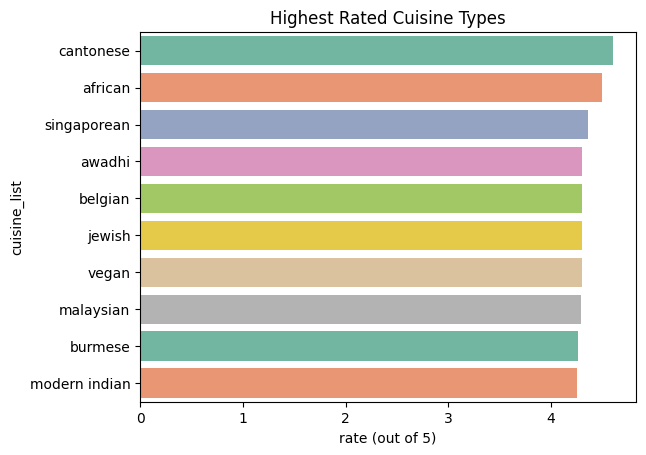

In [40]:
top_cuis2 = grpd_cuis.sort_values(by='rate (out of 5)', ascending = False).head(10)
sns.barplot(x=top_cuis2['rate (out of 5)'], y=top_cuis2.index, palette='Set2')
plt.title('Highest Rated Cuisine Types')

So here comes the final plot: **Top 10 Highest Rated Cuisine Types**

> Interestingly, **none of these top-rated cuisines** appear in the earlier EDA bar plot that highlighted the **most commonly offered cuisine types** in Bangalore.

> **Cantonese, African, and Singaporean cuisines** **top the chart** in terms of customer ratings. Notably, **Cantonese and Modern India** cuisines also appear among the **most expensive**, **reinforcing** the idea of **Bangalore's affluent customer base** and their willingness to spend on premium international flavors.

> The presence of **Vegan cuisine in the 7th position** suggests a **growing awareness and preference** for **animal-friendly, plant-based food options**.

> Overall, the **prominence of international cuisines** in this chart indicates a **strong market and growing demand** for global culinary experiences in Bangalore.   


# Key Insights:



Our **goal** was to **explore customer preferences, spending behavior, and dining trends** in Bangalore using the dataset.

1. **Most popular ≠ Most loved**:
> **None of the top-rated cuisine types** are found in the **top 10 most commonly offered cuisines**, showing that popularity doesn’t guarantee quality.

2. **Affluent customer base:**
> Restaurants offering **table booking and dine-in experiences** are **rated higher** than those without. This suggests that **Bangalore customers** prefer **premium dining experiences** over discounts on online platforms.

3. **Strong preference for international cuisines:**
> Many top-rated cuisines like **Cantonese, African, Singaporean, Malaysian and Burmese** are **international**. This highlights a global taste and a diverse food culture in Bangalore.

4. **Mismatch in restaurant types**:
> While **Quick Bites and Casual Dining** **dominate** the market, they **don’t appear** in the **top-rated categories**. Instead, **Irani Cafes, Microbreweries, and Fine Dining** lead in ratings — restaurants should learn what makes these successful.

5. **Online vs Non-online orders**:
> **Non-online orders (like dine-in)** are generally **more expensive** than online ones. However, the customer ratings don’t solely depend on cost, indicating that service, ambiance, and experience also matter.

6. **Vegan cuisine on the rise**:
> Vegan food ranks among the top-rated cuisines — pointing to a **growing animal-conscious**, health-aware audience.

7. **High cost ≠ High rating (always):**
> While **many expensive restaurant types** like Fine Dining and Microbrewery do **appear** among the **top-rated ones**, the overall **correlation** between **average cost and ratings** is **weak (0.4)**.
This means that cost alone doesn’t determine customer satisfaction — other factors like service quality, ambiance, and cuisine play a major role.


> **Reccomendations:**

1. **Offer More Unique Cuisines**
> Some cuisines like **Cantonese, African, and Singaporean** food are getting **very high ratings** but are **not offered** by many restaurants. This means there’s less competition and a chance to attract more customers by including these cuisines in the menu.

2. **Improve the Dine-In Experience**
> Restaurants that allow table booking and offer a nice ambience (like fine dining or cafes) often get better ratings. So, investing in **good seating, clean environment, and polite staff** can help impress customers.

3. **Make Non-Online Orders More Attractive**
> Non-online orders (like dine-in) are often more expensive. Restaurants can try offering **discounts, combos, or loyalty rewards** to keep dine-in customers happy and coming back.

4. **Learn from High-Rated Restaurant Types**
> Restaurant types like Irani cafes, Microbreweries, and Fine Dining consistently get high ratings. Other restaurants **can observe what they’re doing right** — maybe it’s the food, service, or theme — and try to do something similar.

5. **Promote What People Are Looking For**
> Since more people are enjoying **vegan food and international dishes**, restaurants should highlight these in their **menus, ads, and delivery platforms** to attract that audience.

# End of Project

This marks the completion of my first full-fledged data analysis project.
Gained a lot of practical experience, and I’m ready to take on more challenging datasets ahead!

